In [1]:
%cd ..

/home/work/AnacondaProjects/categorical_bpl


In [2]:
import argparse
import collections
import pyro
import torch
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

In [3]:
%matplotlib inline

In [4]:
torch.autograd.set_detect_anomaly(True)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='omniglot_config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

Files already downloaded and verified


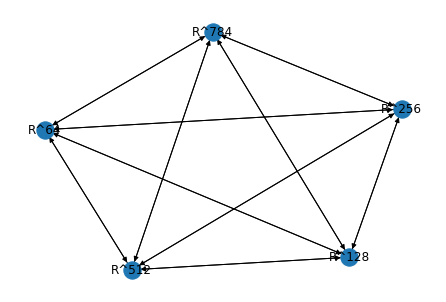

In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch)
model.draw()

In [10]:
optimizer = config.init_obj('optimizer', pyro.optim)

In [11]:
trainer = Trainer(model, [], optimizer, config=config,
                  data_loader=data_loader,
                  valid_data_loader=valid_data_loader)

In [12]:
trainer.train()

Train Epoch: 1 [0/17352 (0%)] Loss: 88777.539062
Train Epoch: 1 [1408/17352 (8%)] Loss: 52848.246094
Train Epoch: 1 [2816/17352 (16%)] Loss: 43475.164062
Train Epoch: 1 [4224/17352 (24%)] Loss: 145167.000000
Train Epoch: 1 [5632/17352 (32%)] Loss: 30136.761719
Train Epoch: 1 [7040/17352 (41%)] Loss: 7834.488281
Train Epoch: 1 [8448/17352 (49%)] Loss: -13428.801758
Train Epoch: 1 [9856/17352 (57%)] Loss: -32056.523438
Train Epoch: 1 [11264/17352 (65%)] Loss: -44461.578125
Train Epoch: 1 [12672/17352 (73%)] Loss: -51174.507812
Train Epoch: 1 [14080/17352 (81%)] Loss: -145481.968750
Train Epoch: 1 [15488/17352 (89%)] Loss: -91262.218750
Train Epoch: 1 [16896/17352 (97%)] Loss: -196676.750000
    epoch          : 1
    loss           : -22729.966394761028
    val_loss       : -197305.2221069336
Train Epoch: 2 [0/17352 (0%)] Loss: -218704.531250
Train Epoch: 2 [1408/17352 (8%)] Loss: -249482.437500
Train Epoch: 2 [2816/17352 (16%)] Loss: -300564.531250
Train Epoch: 2 [4224/17352 (24%)] Loss